In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.2)

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.style.set_precision(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
5,31,female,25.74,0,no,southeast,3756.62
6,46,female,33.44,1,no,southeast,8240.59
7,37,female,27.74,3,no,northwest,7281.51
8,37,male,29.83,2,no,northeast,6406.41
9,60,female,25.84,0,no,northwest,28923.14


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe().round({'age': 2, 'bmi': 2, "children":2})

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.000000
mean,39.21,30.66,1.09,13270.422265
std,14.05,6.10,1.21,12110.011237
min,18.00,15.96,0.00,1121.873900
25%,27.00,26.30,0.00,4740.287150
50%,39.00,30.40,1.00,9382.033000
75%,51.00,34.69,2.00,16639.912515
max,64.00,53.13,5.00,63770.428010


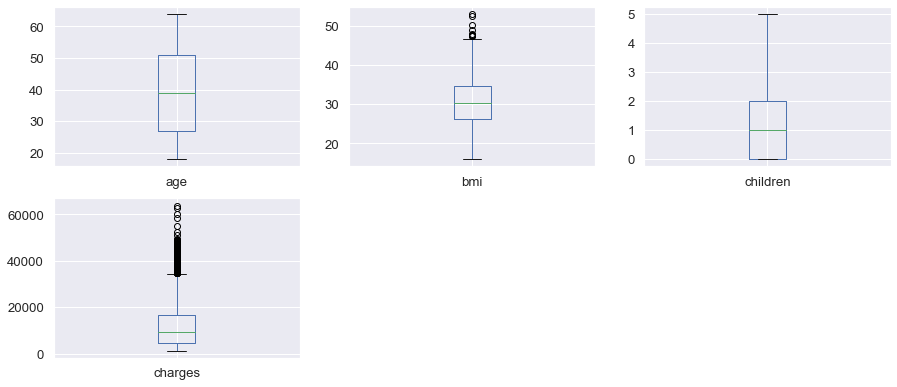

In [8]:
df.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

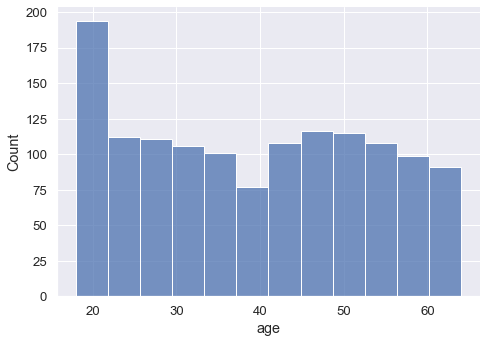

In [9]:
sns.displot(
  data=df,
  x="age",
  kind="hist",
  aspect=1.4
)

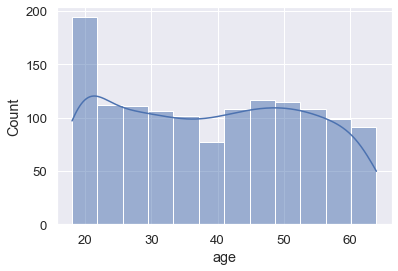

In [10]:
sns.histplot(data=df, x="age", kde=True)

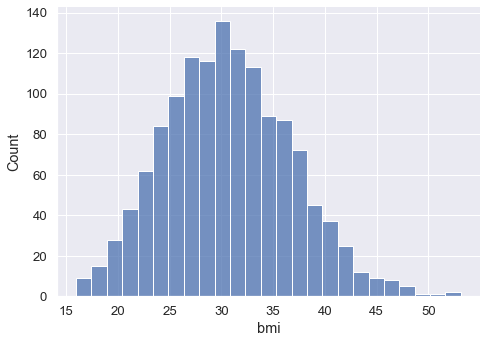

In [11]:
sns.displot(
  data=df,
  x="bmi",
  kind="hist",
  aspect=1.4
)

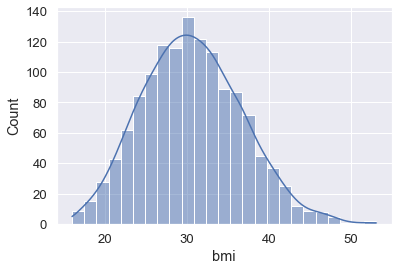

In [12]:
sns.histplot(data=df, x="bmi", kde=True)

In [13]:
pip install seaborn==0.11.0

Note: you may need to restart the kernel to use updated packages.


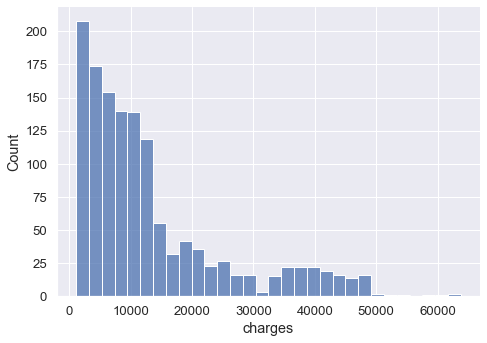

In [14]:
sns.displot(
  data=df,
  x="charges",
  kind="hist",
  aspect=1.4
)

In [15]:
charge_diff = df[['smoker','charges','sex']]
charge_diff_yes=charge_diff.loc[(charge_diff['smoker']=='yes')]

In [16]:
charge_diff = df[['smoker','charges','sex']]
charge_diff_no=charge_diff.loc[(charge_diff['smoker']=='no')]

In [17]:
pd.merge(charge_diff_yes, charge_diff_no, left_index=True, right_index=True)

,smoker_x,charges_x,sex_x,smoker_y,charges_y,sex_y


In [18]:
df_vis=pd.concat([charge_diff_yes, charge_diff_no], axis=1)
df_vis = df_vis.set_axis(['smoker_y','charges1','sex1','smoker_n','charges2','sex2'], axis=1, inplace=False)
df_vis


,smoker_y,charges1,sex1,smoker_n,charges2,sex2
0,yes,16884.9240,female,NaN,NaN,NaN
1,NaN,NaN,NaN,no,1725.55230,male
2,NaN,NaN,NaN,no,4449.46200,male
3,NaN,NaN,NaN,no,21984.47061,male
4,NaN,NaN,NaN,no,3866.85520,male
...,...,...,...,...,...,...
1333,NaN,NaN,NaN,no,10600.54830,male
1334,NaN,NaN,NaN,no,2205.98080,female
1335,NaN,NaN,NaN,no,1629.83350,female
1336,NaN,NaN,NaN,no,2007.94500,female


In [19]:
smoker_female = [len(df_vis[df_vis['smoker_y']=='yes'][df_vis['sex1']=='female']),
             len(df_vis[df_vis['smoker_n']=='no'][df_vis['sex2']=='female'])]

<ipython-input-19-fc38fbf549c7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  smoker_female = [len(df_vis[df_vis['smoker_y']=='yes'][df_vis['sex1']=='female']),
<ipython-input-19-fc38fbf549c7>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df_vis[df_vis['smoker_n']=='no'][df_vis['sex2']=='female'])]


In [20]:
smoker_male = [len(df_vis[df_vis['smoker_y']=='yes'][df_vis['sex1']=='male']),
             len(df_vis[df_vis['smoker_n']=='no'][df_vis['sex2']=='male'])]

<ipython-input-20-0222d8fb5aa3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  smoker_male = [len(df_vis[df_vis['smoker_y']=='yes'][df_vis['sex1']=='male']),
<ipython-input-20-0222d8fb5aa3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df_vis[df_vis['smoker_n']=='no'][df_vis['sex2']=='male'])]


In [21]:
smoker_female

[115, 547]

In [22]:
smoker_male

[159, 517]

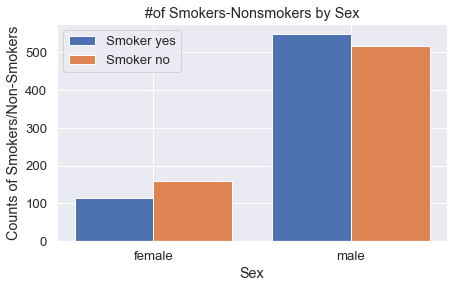

In [23]:
plt.figure(figsize=(7,4))

X = ['female','male']

X_axis = np.arange(len(X))

plt.bar(X_axis-0.2, smoker_female, 0.4,label = 'Smoker yes')
plt.bar(X_axis+0.2, smoker_male, 0.4,label = 'Smoker no')
plt.xticks(X_axis, X)
plt.legend()
plt.xlabel('Sex')
plt.ylabel('Counts of Smokers/Non-Smokers')
plt.title('#of Smokers-Nonsmokers by Sex')
plt.show()

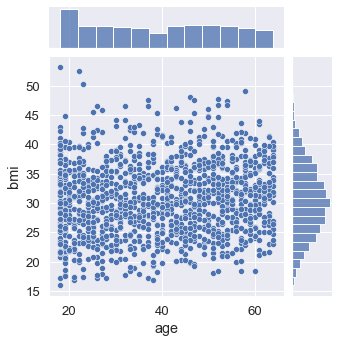

In [24]:
sns.jointplot(x='age' , y='bmi' , data=df , height=5)

In [25]:
data2 = df[["age","bmi"]]
data2.sort_values(["age"], axis=0, ascending=True, inplace=True)

<ipython-input-25-7c6c43c57bf3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.sort_values(["age"], axis=0, ascending=True, inplace=True)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


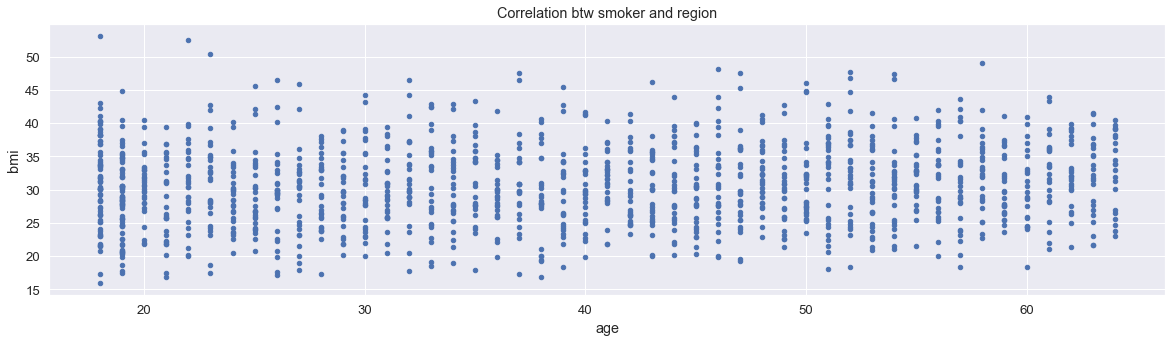

In [26]:
data2.plot.scatter(x="age",y="bmi", title="Correlation btw smoker and region" , figsize=(20,5));

plt.show(block=True);

C:\Users\fcanb\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fcanb\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of charges for non-smokers')

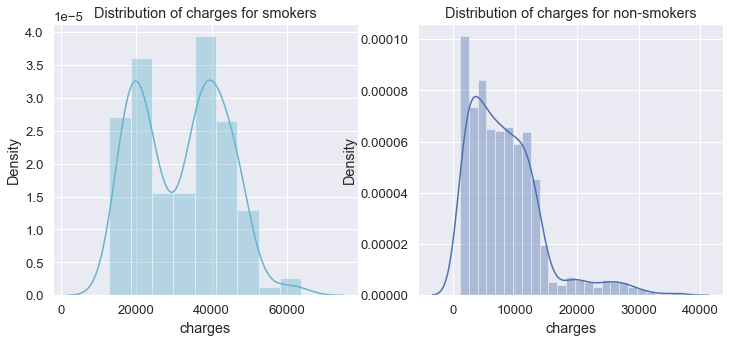

In [27]:
import matplotlib.pyplot as pl

f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 'yes')]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 'no')]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

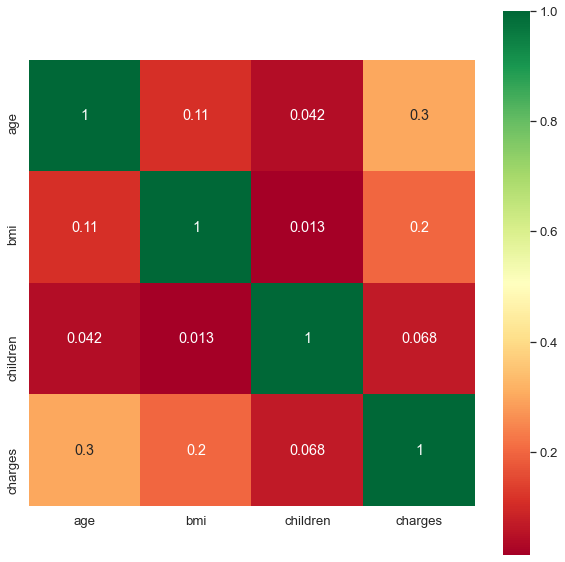

In [28]:
plt.figure(figsize=(10,10)) 
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True) 

In [29]:
def outliers(v):
    a = []
    q1 = df[v].quantile(.25)
    q2 = df[v].quantile(.5)
    q3 = df[v].quantile(.75)
    iqr = q3-q1
    ulim = float(q3+(1.5*iqr))
    llim = float(q1-(1.5*iqr))

    for i in df[v]:
        if i > ulim:
            i=np.NaN
        elif i < llim:
            i = np.NaN
        else:
            i=i
        a.append(i)
        
    return a


for col in df.select_dtypes(exclude='object').columns:
    df[col] = outliers(col)

In [30]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [31]:
df.isna().sum()

age           0
sex           0
bmi           9
children      0
smoker        0
region        0
charges     139
dtype: int64

In [32]:
df2=df.dropna(axis=0)

In [33]:
df2.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [34]:
df_hot =  pd.get_dummies(df2)
df_hot.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [35]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numeric =  pd.DataFrame(sc_X.fit_transform(df_hot[['bmi','charges','age']]),columns=['bmi','charges','age'],index=df_hot.index)

In [36]:
numeric

,bmi,charges,age
0,-0.357841,0.957834,-1.421407
1,0.643111,-1.133608,-1.492543
2,0.511811,-0.757808,-0.781184
3,-1.243693,1.661386,-0.425504
4,-0.190732,-0.838186,-0.496640
...,...,...,...
1333,0.165655,0.090819,0.783807
1334,0.327649,-1.067327,-1.492543
1335,1.168313,-1.146814,-1.492543
1336,-0.715933,-1.094648,-1.279136


In [37]:
df_hot_son = df_hot.copy(deep=True)
df_hot_son[['bmi','charges','age']] = numeric[['bmi','charges','age']]

In [38]:
y = df_hot_son.charges
x = df_hot_son.drop(["charges"],axis=1)

In [39]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 10,test_size=0.2)

In [40]:
R2_Scores = []
models = ['Linear Regression' , 'Lasso Regression' ,'Ridge Regression' , 
          'AdaBoost Regression'  ,"KNeighborsRegressor", 'RandomForestRegressor',"ElasticNet"]

In [41]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)
print("accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

R2_Scores.append(R2)

accuracy: 61.036702694470904%
Mean absolute error: 0.34402698310259283
Mean squared error: 0.41094331848772997
R Squared: 0.610367026944709
Adjusted R Squared: 0.5932778614598279


In [42]:
las_reg = linear_model.Lasso()
las_reg.fit(train_x,train_y)
y_pred = las_reg.predict(test_x)
print("accuracy: "+ str(las_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

R2_Scores.append(R2)

accuracy: -0.14179995996870254%
Mean absolute error: 0.7988654959583026
Mean squared error: 1.05618893781467
R Squared: -0.0014179995996870254
Adjusted R Squared: -0.04533984168739247


In [43]:
rig_reg = linear_model.Ridge()
rig_reg.fit(train_x,train_y)
y_pred = rig_reg.predict(test_x)
print("accuracy: "+ str(rig_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

R2_Scores.append(R2)

accuracy: 61.01898465812114%
Mean absolute error: 0.34467764283344643
Mean squared error: 0.4111301894447119
R Squared: 0.6101898465812114
Adjusted R Squared: 0.5930929100277558


In [44]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import  cross_val_score
clf_ar = AdaBoostRegressor(n_estimators=1000)
clf_ar.fit(train_x , train_y)
accuracies = cross_val_score(estimator = clf_ar, X = train_x, y = train_y, cv = 5,verbose = 1)
y_pred = clf_ar.predict(test_x)
print('')
print('###### AdaBoost Regression ######')
print('Score : %.4f' % clf_ar.score(test_x, test_y))
print(accuracies)

mse = mean_squared_error(test_y, y_pred)
mae = mean_absolute_error(test_y, y_pred)
rmse = mean_squared_error(test_y, y_pred)**0.5
r2 = r2_score(test_y, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


###### AdaBoost Regression ######
Score : 0.5848
[0.52469036 0.53512479 0.51548894 0.60288418 0.59517302]

MSE    : 0.44 
MAE    : 0.36 
RMSE   : 0.66 
R2     : 0.58 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [45]:
from sklearn.neighbors import KNeighborsRegressor
clf_knn = KNeighborsRegressor()
clf_knn.fit(train_x , train_y)
accuracies = cross_val_score(estimator = clf_knn, X = train_x, y = train_y, cv = 5,verbose = 1)
y_pred = clf_knn.predict(test_x)
print('')
print('###### KNeighbours Regression ######')
print('Score : %.4f' % clf_knn.score(test_x, test_y))
print(accuracies)

mse = mean_squared_error(test_y, y_pred)
mae = mean_absolute_error(test_y, y_pred)
rmse = mean_squared_error(test_y, y_pred)**0.5
r2 = r2_score(test_y, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


###### KNeighbours Regression ######
Score : 0.5321
[0.45665216 0.48786505 0.6105324  0.56640762 0.37141883]

MSE    : 0.49 
MAE    : 0.41 
RMSE   : 0.70 
R2     : 0.53 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [46]:
from sklearn.ensemble import RandomForestRegressor
clf_rf = RandomForestRegressor()
clf_rf.fit(train_x , train_y)
accuracies = cross_val_score(estimator = clf_rf, X = train_x, y = train_y, cv = 5,verbose = 1)
y_pred = clf_rf.predict(test_x)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % clf_rf.score(test_x, test_y))
print(accuracies)

mse = mean_squared_error(test_y, y_pred)
mae = mean_absolute_error(test_y, y_pred)
rmse = mean_squared_error(test_y, y_pred)**0.5
r2 = r2_score(test_y, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### Random Forest ######
Score : 0.6392
[0.52831474 0.54527892 0.62785542 0.66720552 0.58774709]

MSE    : 0.38 
MAE    : 0.33 
RMSE   : 0.62 
R2     : 0.64 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished


In [47]:
from sklearn.linear_model import  ElasticNet
classifier = ElasticNet()
classifier.fit(train_x,train_y)
accuracies = cross_val_score(estimator = classifier, X = train_x, y = train_y, cv = 5, scoring = 'r2',verbose = 1)
r2 = classifier.score(test_x,test_y)
print('Elastic Net accuracy: ', classifier.score(test_x,test_y))
print(accuracies)
print("mean = {0}, std = {1}".format(np.mean(accuracies), np.std(accuracies)))

R2_Scores.append(r2)

Elastic Net accuracy:  -0.0014179995996870254
[-0.00034529 -0.00430022 -0.00948856 -0.01666886 -0.01385733]
mean = -0.008932053707236242, std = 0.005993539809878357


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [48]:
compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores' ,ascending=False)

,Algorithms,R2-Scores
5,RandomForestRegressor,0.639154
0,Linear Regression,0.610367
2,Ridge Regression,0.610190
3,AdaBoost Regression,0.584815
4,KNeighborsRegressor,0.532111
1,Lasso Regression,-0.001418
6,ElasticNet,-0.001418
